In [16]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
eps = np.finfo(float).eps

In [63]:
data = pd.read_csv("Fexp5-Página1.csv", decimal = ",")

In [64]:
media_carga = [data["cargar"][i] for i in range(0,96)]
media_tempo_carga = [data["tempoc"][i] for i in range(0,96)]
media_descarga = [data["descarga"][i] for i in range(0,96)]
media_tempo_descarga = [data["tempod"][i] for i in range(0,96)]

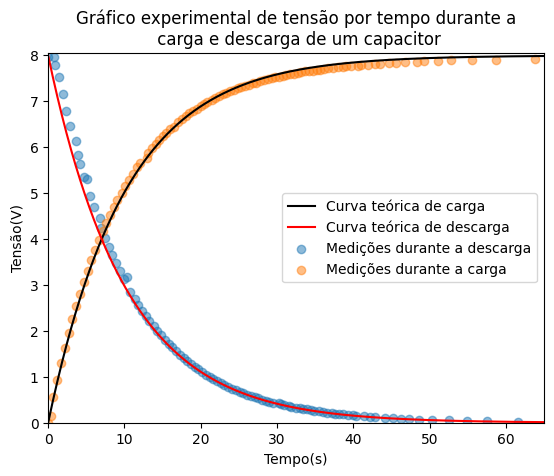

In [65]:
#Obs: Resistor de 4600 ohms
def carga(t):
    return 8*(1-np.exp(-t/(10.12)))
def descarga(t):
    return 8*(np.exp(-t/(10.12)))
tempo = np.arange(0,65,0.1)
plt.figure(num=0,dpi=100)
plt.plot(tempo, carga(tempo), color ="black", label="Curva teórica de carga")
plt.plot(tempo, descarga(tempo), color="r", label="Curva teórica de descarga")
plt.scatter(media_tempo_descarga, media_descarga, label = "Medições durante a descarga", alpha=0.5)
plt.scatter(media_tempo_carga, media_carga, label="Medições durante a carga",alpha=0.5)
plt.title("Gráfico experimental de tensão por tempo durante a\n carga e descarga de um capacitor")
plt.xlim(0, 65)
plt.ylim(0, 8.05)
plt.xlabel("Tempo(s)")
plt.ylabel("Tensão(V)")
plt.legend()
plt.show()
###Para Salvar:
#fig = plt.gcf()
#fig.savefig('Gráfico.png', format='png')

In [92]:
#Previsão de curva de carga
def prevCarga(x,a,b):
    return a*(1-np.exp(-x/b))

poptCarga,pcovCarga = curve_fit(prevCarga, media_tempo_carga, media_carga, p0=[8,10.12])

x_modelCarga = np.arange(0,65,0.1)
y_modelCarga = prevCarga(x_modelCarga,poptCarga[0],poptCarga[1])

In [93]:
#Previsão de curva de descarga
def prevDescarga(x,a,b):
    return a*np.exp(-x/b)

poptDescarga,pcovDescarga = curve_fit(prevDescarga, media_tempo_descarga,media_descarga, p0=[8,10.12])

x_modelDescarga = np.arange(0,65,0.1)
y_modelDescarga = prevDescarga(x_modelDescarga, poptDescarga[0], poptDescarga[1])


In [114]:
constanteDeTempoY = [5.04 for i in np.arange(0,10.12,1)]
tempoCt = [i for i in np.arange(0,10.12,1)]
constanteDeTempoX = [i for i in np.arange(0,6,1)]
tempoCt2 = [10.12 for i in np.arange(0,6,1)]
encontro = [4.2 for i in np.arange(0,65,0.1)]
retaBaixoY = [3.1 for i in np.arange(0,10.12,1)]
retaBaixoX = [i for i in np.arange(0,10.12,1)]


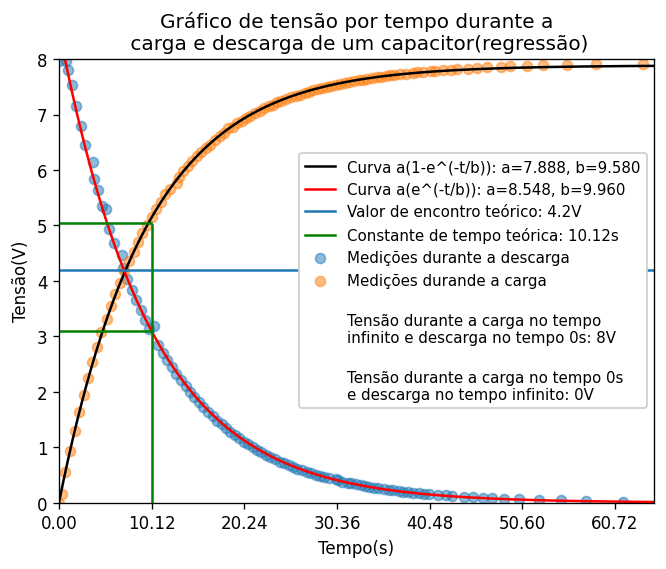

In [115]:
plt.figure(num=0,dpi=120)
plt.plot(x_modelCarga, y_modelCarga, label="Curva a(1-e^(-t/b)): a=%5.3f, b=%5.3f"%tuple(poptCarga), color="black")
plt.plot(x_modelDescarga, y_modelDescarga, label="Curva a(e^(-t/b)): a=%5.3f, b=%5.3f"%tuple(poptDescarga), color="r")
plt.plot(x_modelDescarga, encontro, label="Valor de encontro teórico: 4.2V")
plt.plot(tempoCt2, constanteDeTempoX, color="g")
plt.plot(tempoCt, constanteDeTempoY, label="Constante de tempo teórica: 10.12s", color="g")
plt.scatter(media_tempo_descarga, media_descarga, label = "Medições durante a descarga", alpha=0.5)
plt.scatter(media_tempo_carga, media_carga, label="Medições durande a carga",alpha=0.5)
plt.scatter(0,0, label="\nTensão durante a carga no tempo\ninfinito e descarga no tempo 0s: 8V", alpha=0)
plt.scatter(0,0, label="\nTensão durante a carga no tempo 0s\ne descarga no tempo infinito: 0V", alpha=0)
plt.plot(retaBaixoX, retaBaixoY, color="g")
plt.xticks(np.arange(0, 65, step=10.12))
plt.ylabel("Tensão(V)")
plt.xlabel("Tempo(s)")
plt.xlim(0, 65)
plt.ylim(0, 8)
plt.title("Gráfico de tensão por tempo durante a\n carga e descarga de um capacitor(regressão)")
plt.legend(fontsize = 9, loc=5, framealpha= 1)